# Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
    •	Which variables are important to predict the price of variable?
    •	How do these variables describe the price of the house?
# Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.
# Technical Requirements:
    •	Data contains 1460 entries each having 81 variables.
    •	Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
    •	Extensive EDA has to be performed to gain relationships of important variable and price.
    •	Data contains numerical as well as categorical variable. You need to handle them accordingly.
    •	You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters. 
    •	You need to find important features which affect the price positively or negatively.


In [1]:
# Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.pandas.set_option('display.max_columns',None) # Display all the columns

In [2]:
# Loading Dataset
df = pd.read_csv('Data file.csv')

In [3]:
# Rows, Columns
df.shape

(1460, 81)

In [4]:
# Looking at the features' info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# First 10 rows
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

One Observation here is that a lot of variables have been labelled at NaN, but they are actually not null values and have certain meaning. 

For Example, 
  * NA in feature 'Alley' means No_Alley
  * in case of PoolQC, NA means 'No Pool' (* Refer Data Description at the end of the notebook)

I'm replacing them with actual variables before going further!

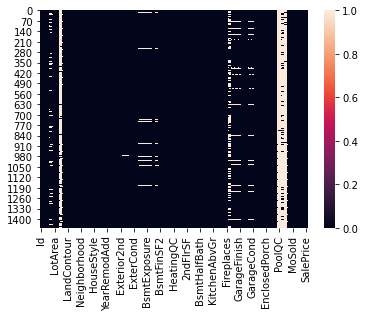

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

In [6]:
# Identifying null values
sns.heatmap(df.isnull())
plt.show()
# Let's see the top 20 features with null values
(df.isnull().sum()/len(df.index)).sort_values(ascending=False).head(20)

# First let us handle Categorical features which are missing; based on domain knowledge and given explanation

In [7]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [8]:
# As per given definition, NA means No Pool. Let's replace NAs with 'No_Pool'
df['PoolQC'].fillna('No_Pool',inplace=True)
print(df['PoolQC'].value_counts())

# As per given definition, NA means None. Let's replace NAs with 'None'
df['MiscFeature'].fillna('None',inplace=True)
print(df['MiscFeature'].value_counts())


# As per given definition, NA means No_alley_access. Let's replace NAs with 'No_alley_access'
df['Alley'].fillna('No_alley_access',inplace=True)
print(df['Alley'].value_counts())

# As per given definition, NA means No_Fence. Let's replace NAs with 'No_Fence'
df['Fence'].fillna('No_Fence',inplace=True)
print(df['Fence'].value_counts())

# As per given definition, NA means No_Fireplace. Let's replace NAs with 'No_Fireplace'
df['FireplaceQu'].fillna('No_Fireplace',inplace=True)
print(df['FireplaceQu'].value_counts())

basement=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
# As per given definition, NA means No_Basement. Let's replace NAs with 'No_Basement'
for i in basement:
    df[i].fillna('No_Basement',inplace=True)
    print(df[i].value_counts())
    
garage=['GarageType','GarageFinish','GarageQual','GarageCond']
for i in garage:
    print(df[i].value_counts())
# As per given definition, NA means No_Garage (Refer Variable Description at the end of the notebook). Let's replace NAs with 'No_Garage'
for i in garage:
    df[i].fillna('No_Garage',inplace=True)
    print(df[i].value_counts())

No_Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64
None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64
No_alley_access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64
No_Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64
No_Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64
TA             649
Gd             618
Ex             121
No_Basement     37
Fa              35
Name: BsmtQual, dtype: int64
TA             1311
Gd               65
Fa               45
No_Basement      37
Po                2
Name: BsmtCond, dtype: int64
No             953
Av             221
Gd             134
Mn             114
No_Basement     38
Name: BsmtExposure, dtype: int64
Unf            430
GLQ            418
ALQ            220
BLQ          

Replacing all other categorical missing values with a new label 'Missing' although only 1 is left - 'MasVnrType'

In [9]:
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

df=replace_cat_feature(df,features_nan)

df[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [10]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

I'll handle the numerical missing values during Feature Engineering

In [11]:
# Description (objet datatypes)
df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1459,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,8,5,8,6,8,15,16,5,4,5,6,5,5,5,7,7,6,5,2,5,4,7,6,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,No_alley_access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,No_Fireplace,Attchd,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,690,870,605,1311,1326,1340,1453,1179,1406,1267,1198


In [12]:
# Description (non objet datatypes)
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
# Let's drop Id Column as it doesn't help in Feature Engineering
print("Id of Houses ",len(df['Id']))
df.drop('Id',axis=1,inplace=True)

Id of Houses  1460


# Numerical variables

In [14]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


# Year Features

In [15]:
# (identified features with Year using key words 'year' or 'yr' in column headers)
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [16]:
# Exploring the content of these year variables
for feature in year_feature:
    print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'Mean House Price vs YearSold')

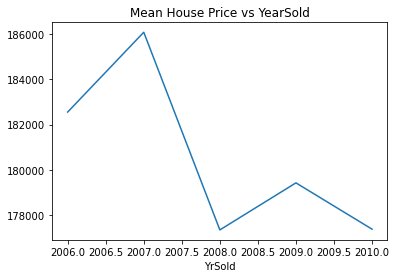

In [17]:
# Analyzing Prices of House vs Year Built
df.groupby('YrSold')['SalePrice'].mean().plot()
plt.title("Mean House Price vs YearSold")

There seems to be a peak in House Prices, but a sharp drop in between 2007 to 2008. This can be due to Economic Crash. "Economies worldwide slowed during this period since credit tightened and international trade declined. Housing markets suffered and unemployment soared, resulting in evictions and foreclosures."

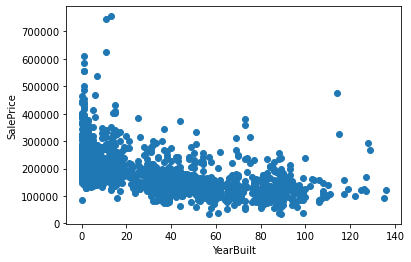

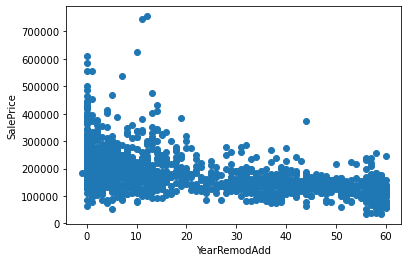

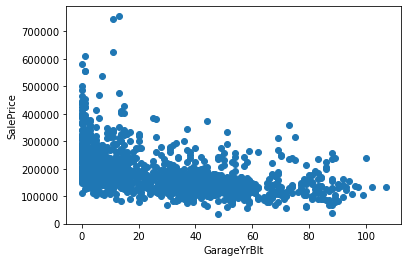

In [18]:
# Let's see the scatterplot between All years features with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=df.copy()
        # Capturing the difference between year variable and year the house was sold
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

* Obs 1: The Houses built recently have Higher Sales Price.
* Obs 2: The Houses remodelled recently have Higher Sales Price.
* Obs 3: The Houses whose Garages were built recently have Higher Sales Price.

# Identifying Discrete Variables

In [19]:
discrete_feature=[feature for feature in numerical_features 
                  if len(df[feature].unique())<25 and 
                  feature not in year_feature]
print("Count of Discrete Variables is:",len(discrete_feature))

Count of Discrete Variables is: 17


In [20]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [21]:
df[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


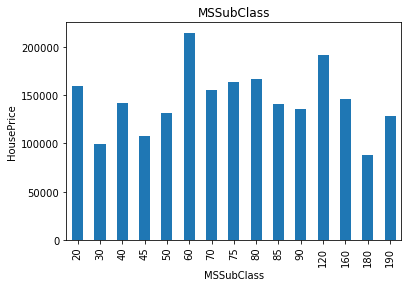

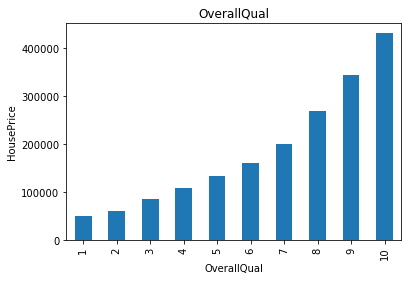

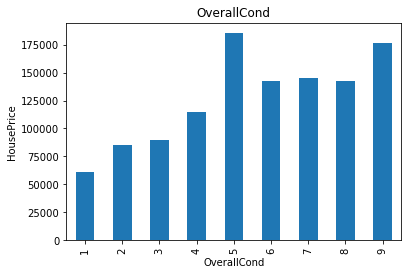

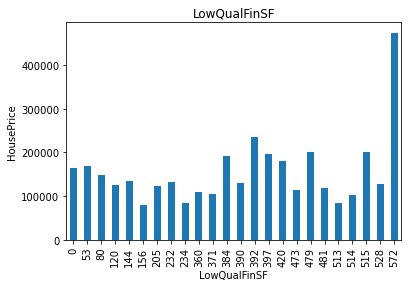

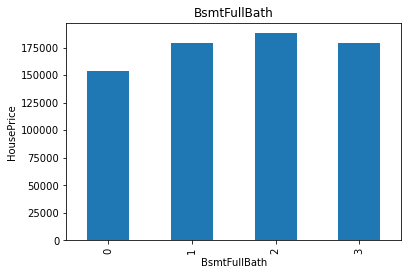

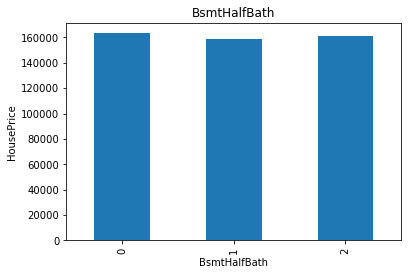

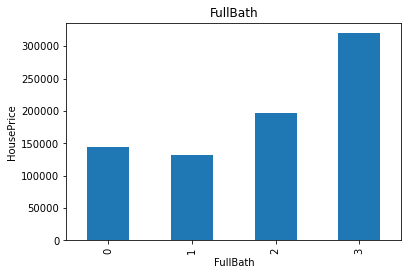

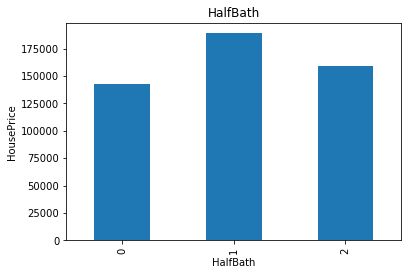

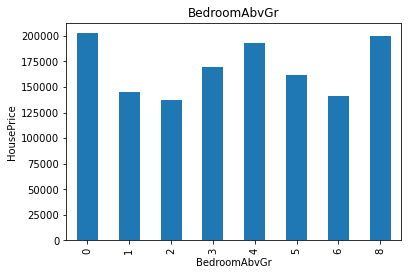

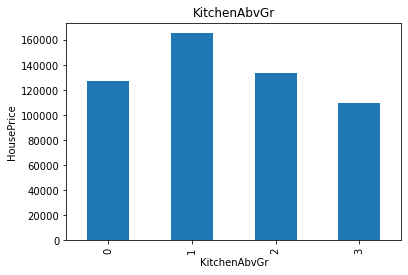

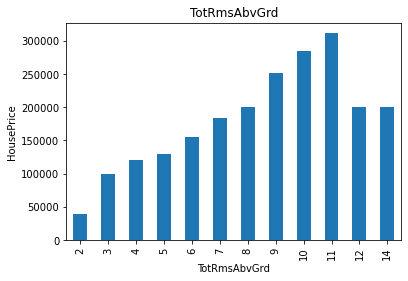

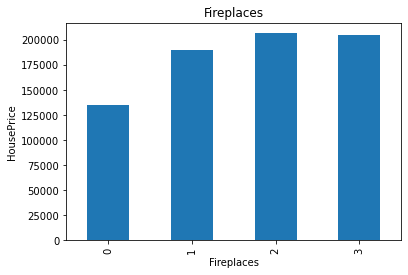

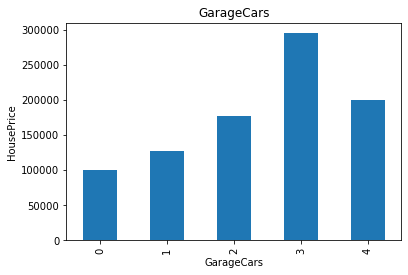

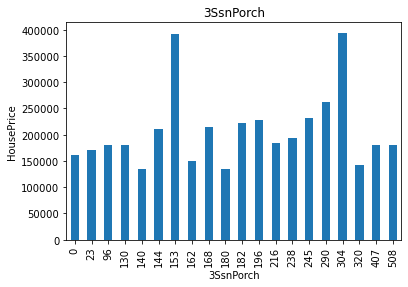

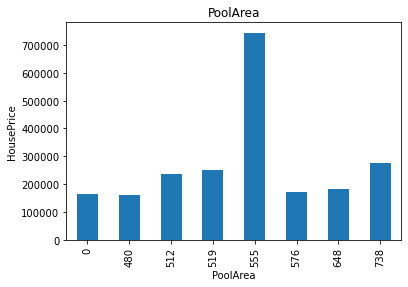

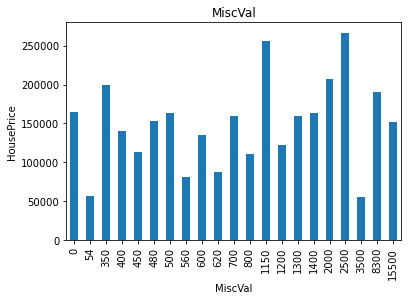

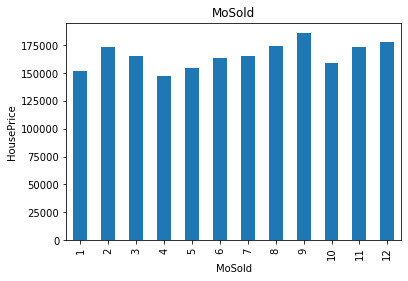

In [22]:
# All Discrete Features vs House Prices

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('HousePrice')
    plt.title(feature)
    plt.show()

# Identifying Continous Features

In [23]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count",len(continuous_feature))

Continuous feature Count 16


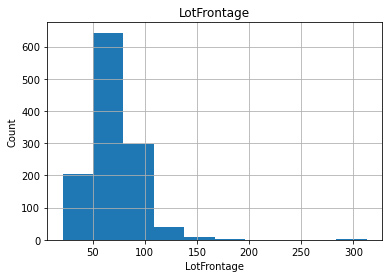

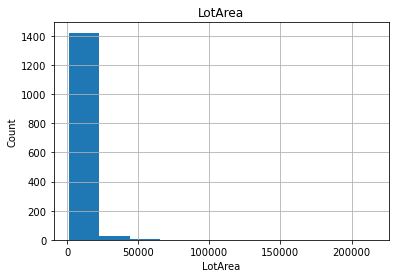

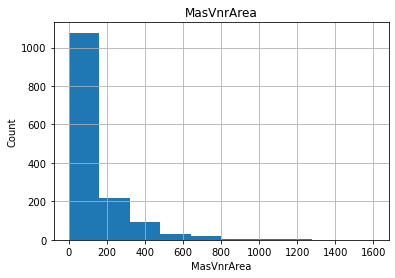

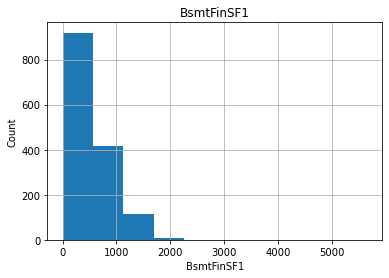

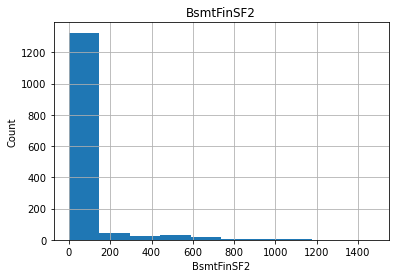

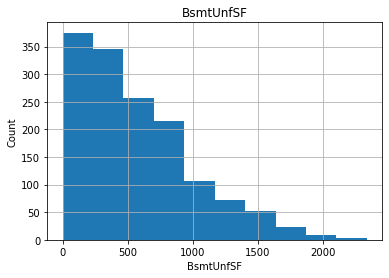

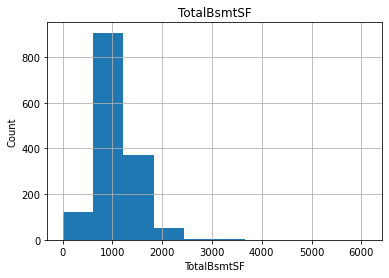

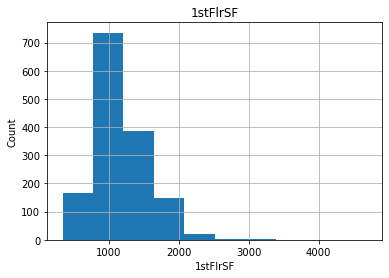

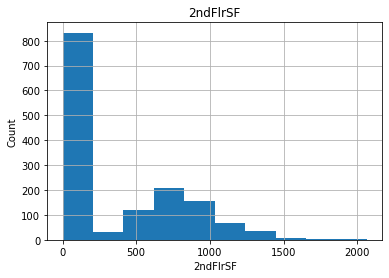

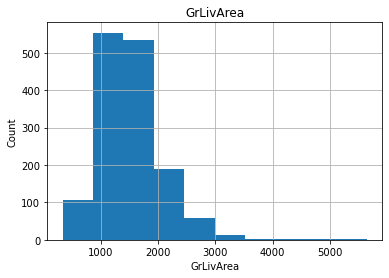

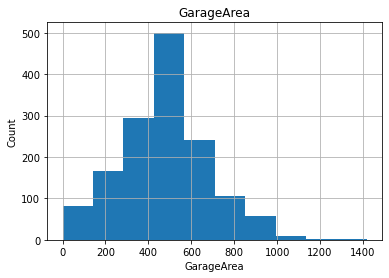

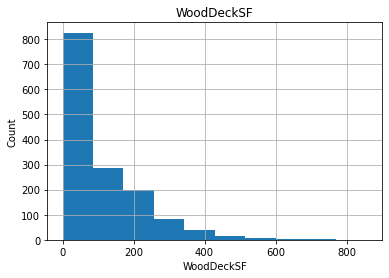

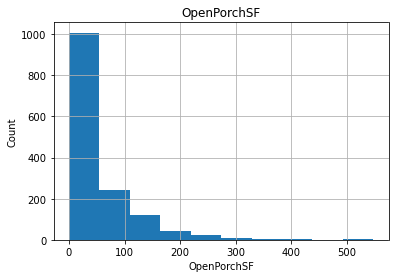

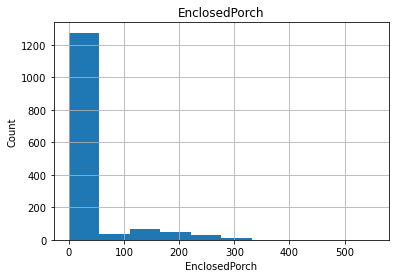

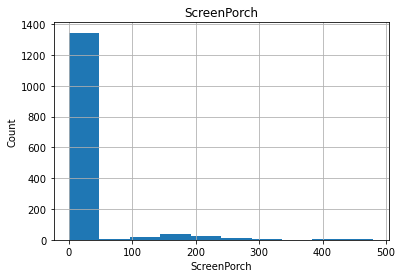

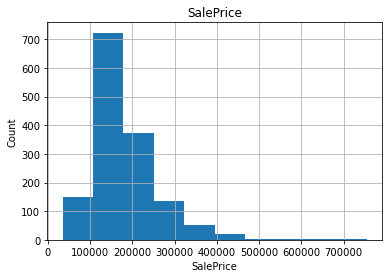

In [24]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

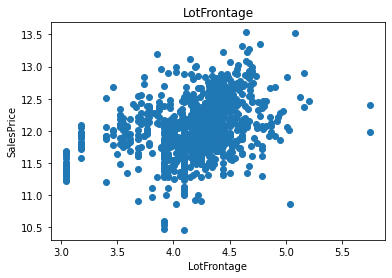

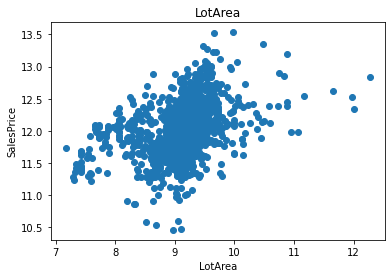

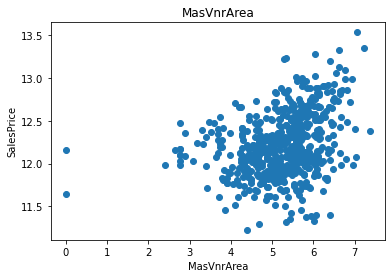

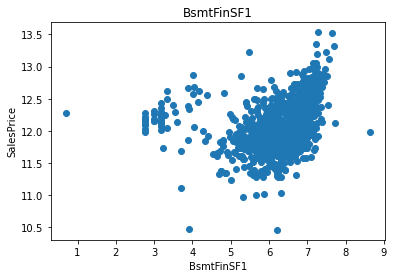

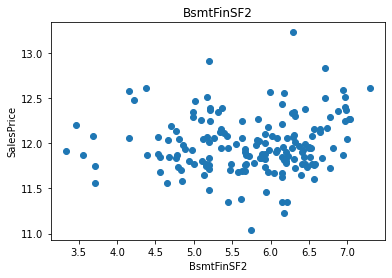

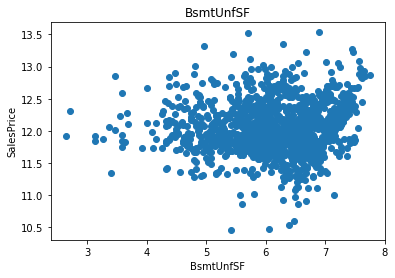

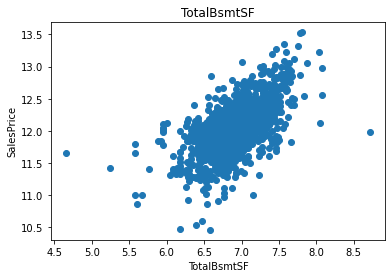

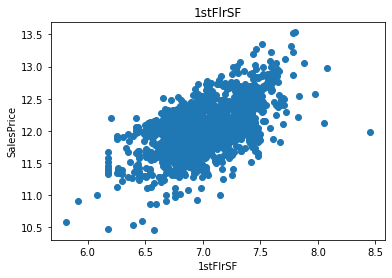

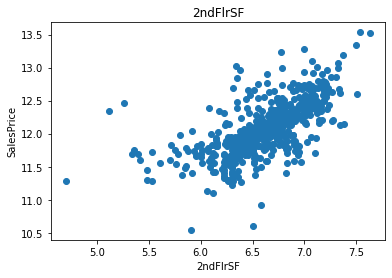

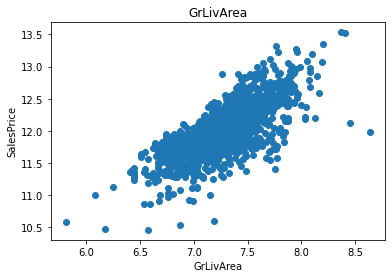

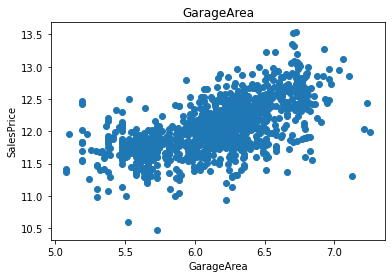

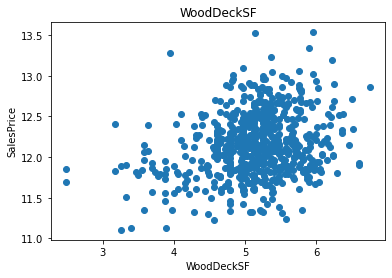

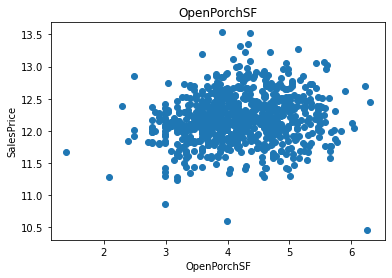

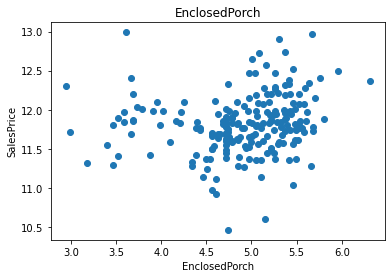

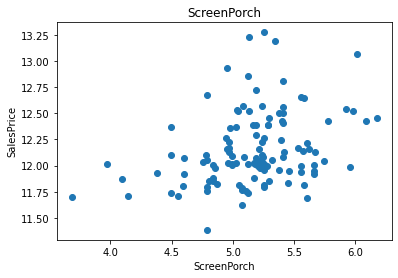

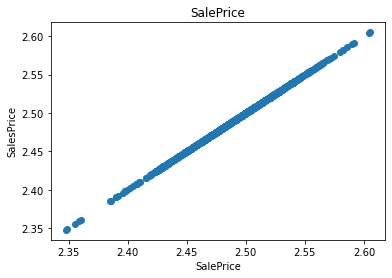

In [25]:
# As clear from above a lot of features are not normally distributed. Let's do log transformation
for feature in continuous_feature:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data['SalePrice']=np.log(data['SalePrice'])
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()

# Categorical Features

In [26]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No_alley_access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No_Fireplace,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
1,RL,Pave,No_alley_access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
2,RL,Pave,No_alley_access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
3,RL,Pave,No_alley_access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Abnorml
4,RL,Pave,No_alley_access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal


In [27]:
for feature in categorical_features:
    print('{} has {} categories'.format(feature,len(df[feature].unique())))

MSZoning has 5 categories
Street has 2 categories
Alley has 3 categories
LotShape has 4 categories
LandContour has 4 categories
Utilities has 2 categories
LotConfig has 5 categories
LandSlope has 3 categories
Neighborhood has 25 categories
Condition1 has 9 categories
Condition2 has 8 categories
BldgType has 5 categories
HouseStyle has 8 categories
RoofStyle has 6 categories
RoofMatl has 8 categories
Exterior1st has 15 categories
Exterior2nd has 16 categories
MasVnrType has 5 categories
ExterQual has 4 categories
ExterCond has 5 categories
Foundation has 6 categories
BsmtQual has 5 categories
BsmtCond has 5 categories
BsmtExposure has 5 categories
BsmtFinType1 has 7 categories
BsmtFinType2 has 7 categories
Heating has 6 categories
HeatingQC has 5 categories
CentralAir has 2 categories
Electrical has 6 categories
KitchenQual has 4 categories
Functional has 7 categories
FireplaceQu has 6 categories
GarageType has 7 categories
GarageFinish has 4 categories
GarageQual has 6 categories
Garag

Feature Neighborhood contains 25 categories.

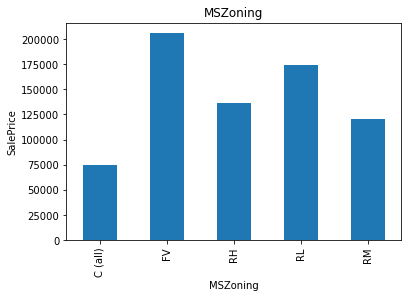

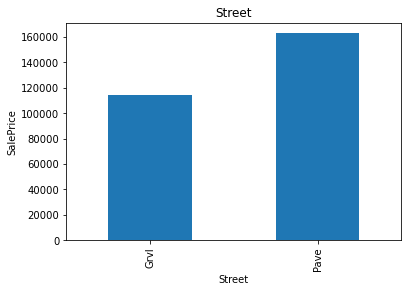

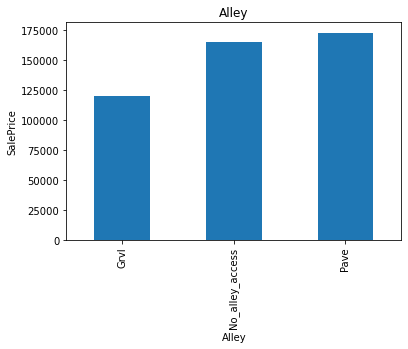

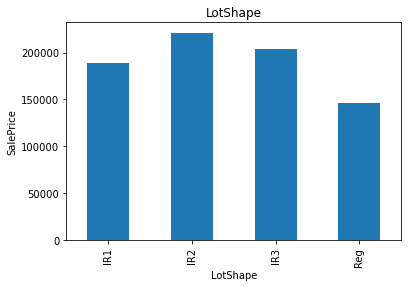

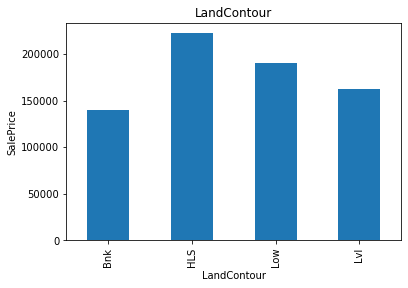

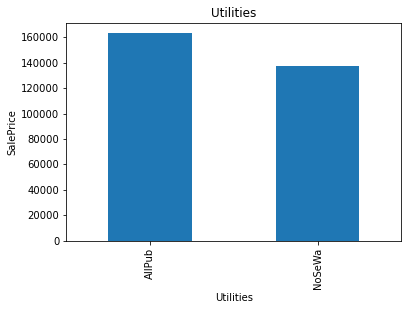

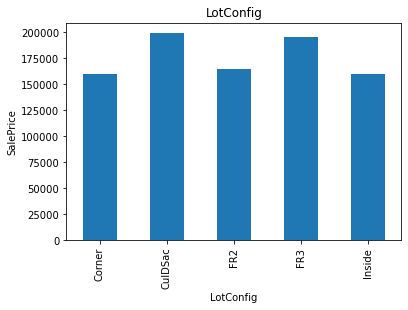

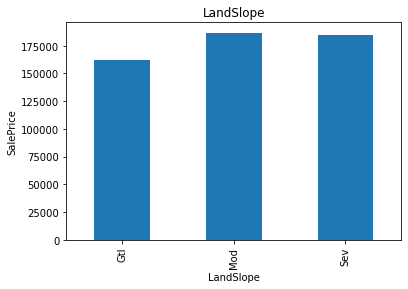

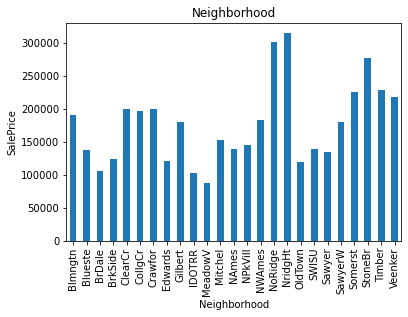

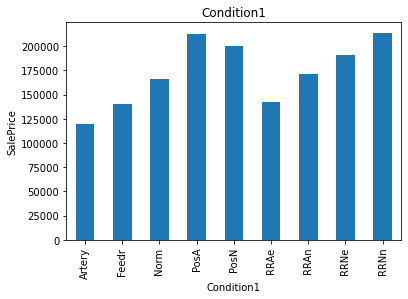

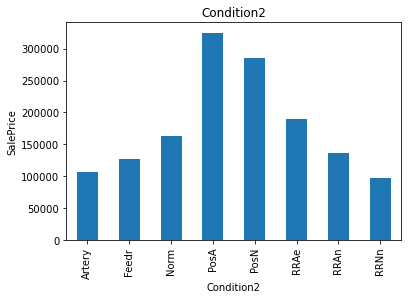

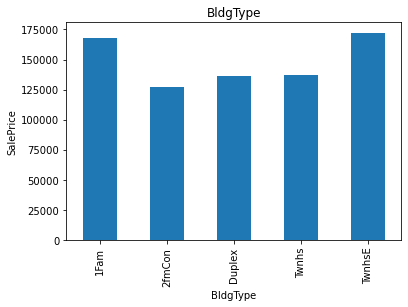

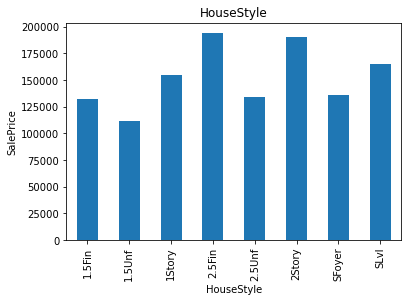

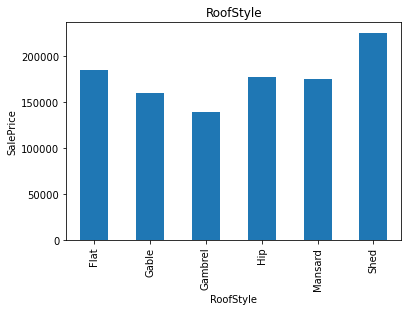

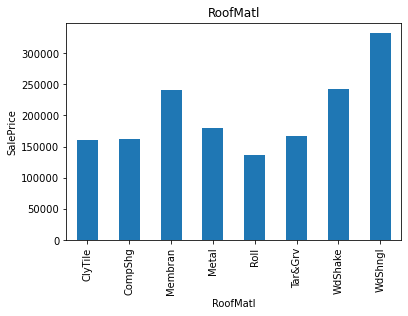

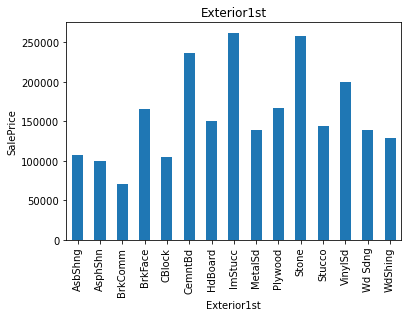

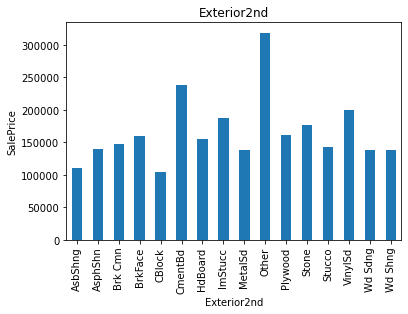

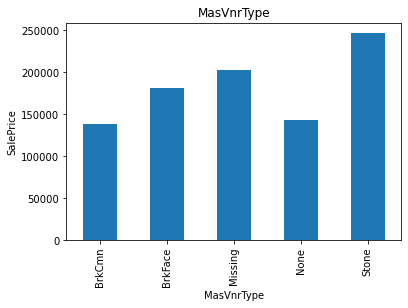

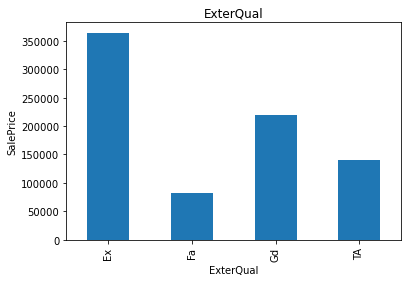

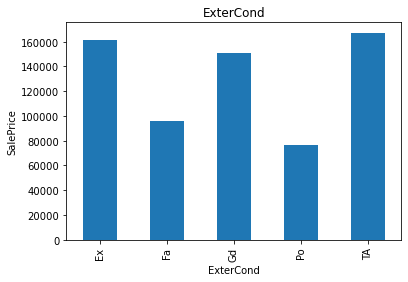

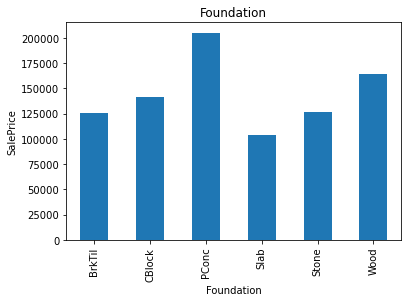

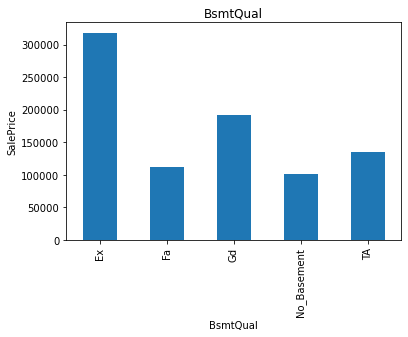

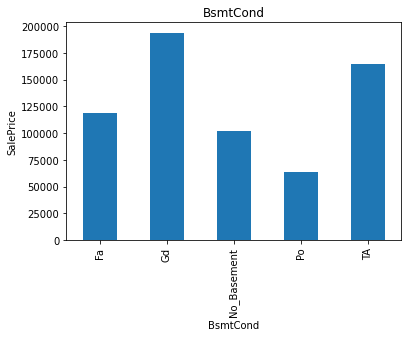

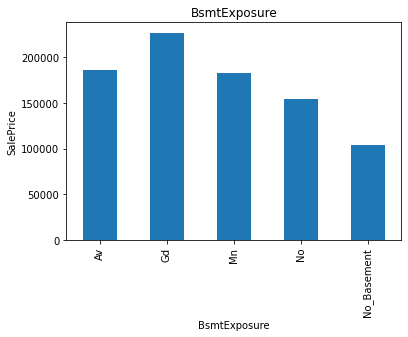

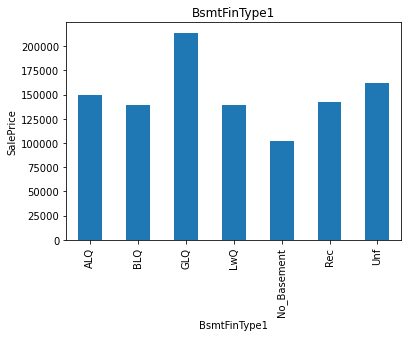

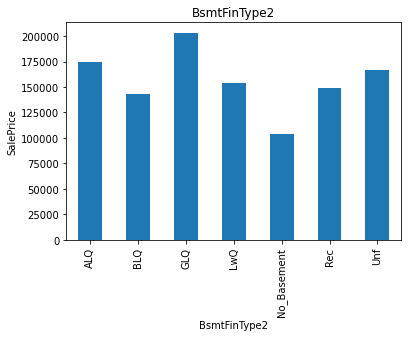

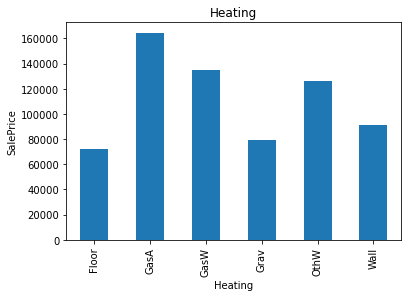

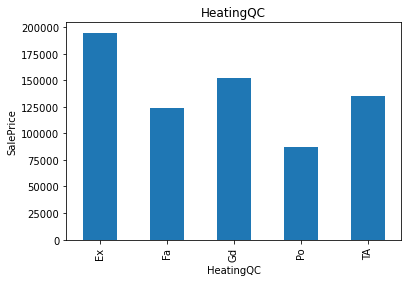

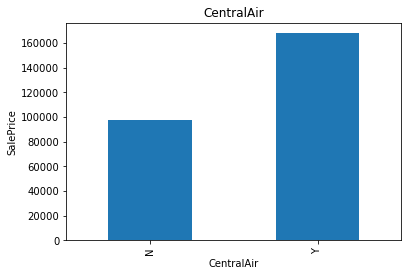

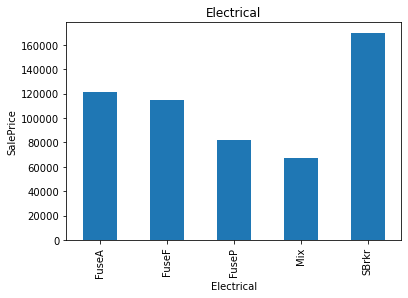

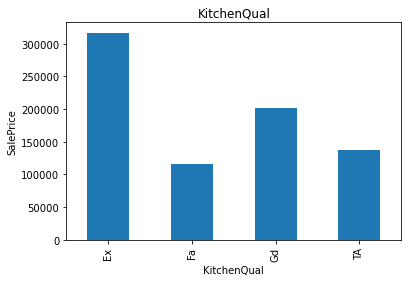

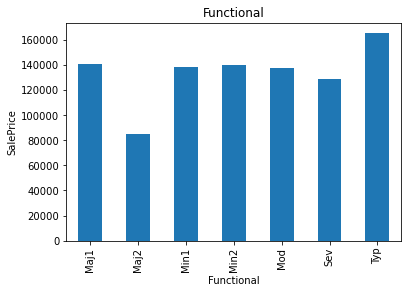

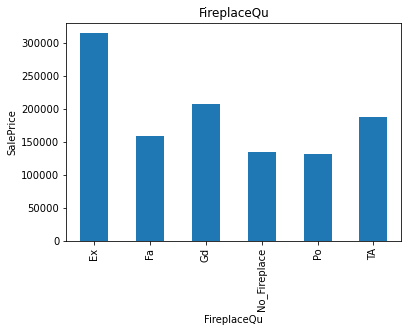

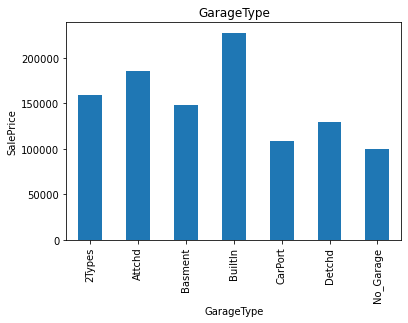

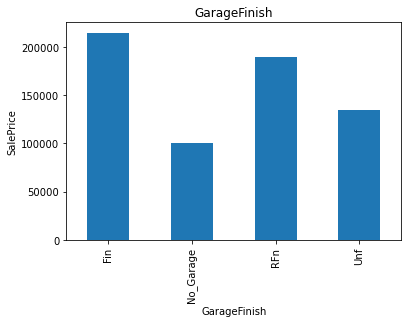

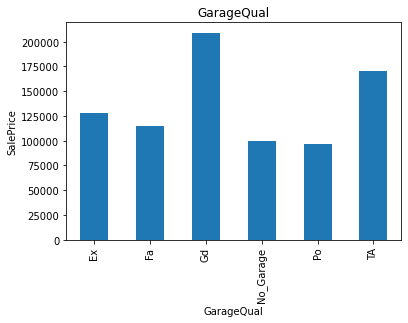

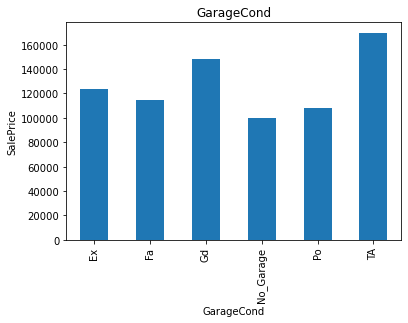

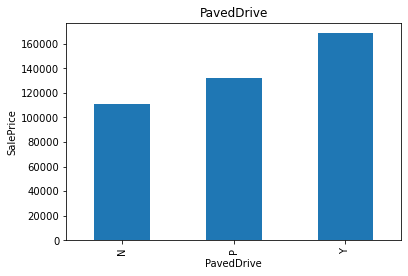

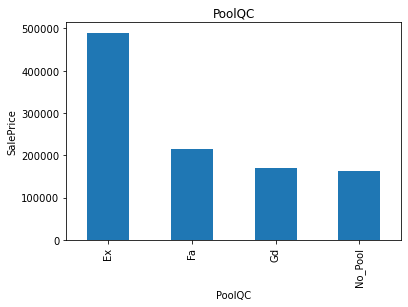

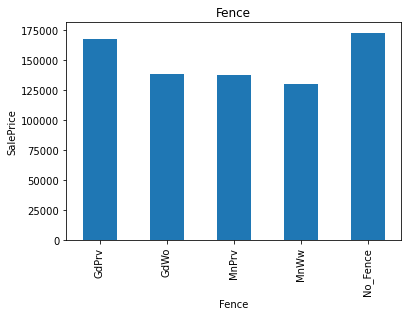

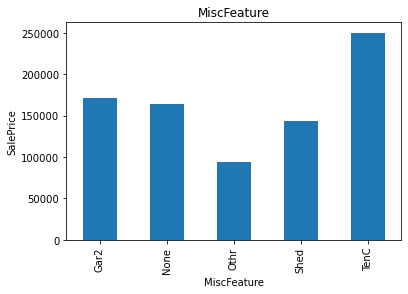

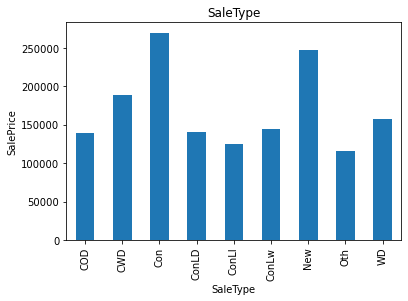

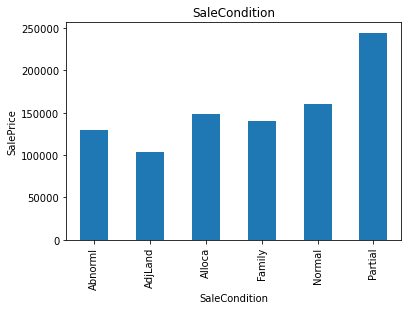

In [28]:
# Categorical variables vs SalesPrice
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Feature Engineering

In [29]:
# I've already treated all Null Values in categorical Features, Now I will check for numerical variables
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

# I am displaying the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}".format(feature,np.around(df[feature].isnull().mean(),4)))

LotFrontage: 0.1774
MasVnrArea: 0.0055
GarageYrBlt: 0.0555


In [30]:
# Replacing by using median since there are outliers
for feature in numerical_with_nan:
    median_value=df[feature].median()
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

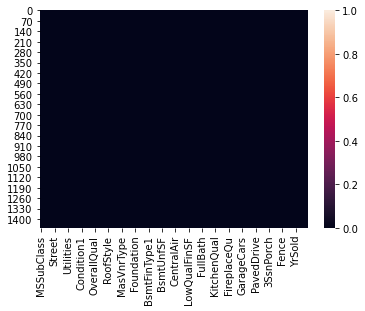

In [31]:
# Confirming null values
sns.heatmap(df.isnull())
plt.show()

In [32]:
# Now, as there were some features(Temporal) which contained year values,let's change them to difference from year of Sale
years=['YearBuilt','YearRemodAdd','GarageYrBlt']
for feature in years:
    df[feature]=df['YrSold']-df[feature]

In [33]:
df[years].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


# Handling Rare Categorical Feature
We will remove categorical variables that are present less than 1% of the observations

In [34]:
for feature in categorical_features:
    temp=df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

# Label Encoding the Categorical Features For Machine to understand

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_features:
    df[i]=le.fit_transform(df[i])

In [36]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,2,65.0,8450,0,1,3,3,0,3,0,4,2,0,0,2,7,5,5,5,0,0,8,8,1,196.0,1,3,2,2,4,3,2,706,6,0,150,856,0,0,1,3,856,854,0,1710,1,0,2,1,3,1,2,8,4,0,3,0,5.0,2,2,548,3,3,2,0,61,0,0,0,0,0,3,0,0,2,2008,3,2,208500
1,20,2,80.0,9600,0,1,3,3,0,2,0,16,1,0,0,1,6,8,31,31,0,0,4,4,2,0.0,3,3,1,2,4,1,0,978,6,0,284,1262,0,0,1,3,1262,0,0,1262,0,1,2,0,3,1,3,6,4,1,5,0,31.0,2,2,460,3,3,2,298,0,0,0,0,0,0,3,0,0,5,2007,3,2,181500
2,60,2,68.0,11250,0,1,0,3,0,3,0,4,2,0,0,2,7,5,7,6,0,0,8,8,1,162.0,1,3,2,2,4,2,2,486,6,0,434,920,0,0,1,3,920,866,0,1786,1,0,2,1,3,1,2,6,4,1,5,0,7.0,2,2,608,3,3,2,0,42,0,0,0,0,0,3,0,0,9,2008,3,2,223500
3,70,2,60.0,9550,0,1,0,3,0,0,0,5,2,0,0,2,7,5,91,36,0,0,9,10,2,0.0,3,3,0,4,1,3,0,216,6,0,540,756,0,2,1,3,961,756,0,1717,1,0,1,0,3,1,2,7,4,1,2,3,8.0,3,3,642,3,3,2,0,35,272,0,0,0,0,3,0,0,2,2006,3,0,140000
4,60,2,84.0,14260,0,1,0,3,0,2,0,13,2,0,0,2,8,5,8,8,0,0,8,8,1,350.0,1,3,2,2,4,0,2,655,6,0,490,1145,0,0,1,3,1145,1053,0,2198,1,0,2,1,4,1,2,9,4,1,5,0,8.0,2,3,836,3,3,2,192,84,0,0,0,0,0,3,0,0,12,2008,3,2,250000


In [37]:
df.shape

(1460, 80)

# Skewness in some Continous Variables

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'WoodDeckSF'}>],
       [<AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>,
        <AxesSubplot:title={'center':'ScreenPorch'}>,
        <AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

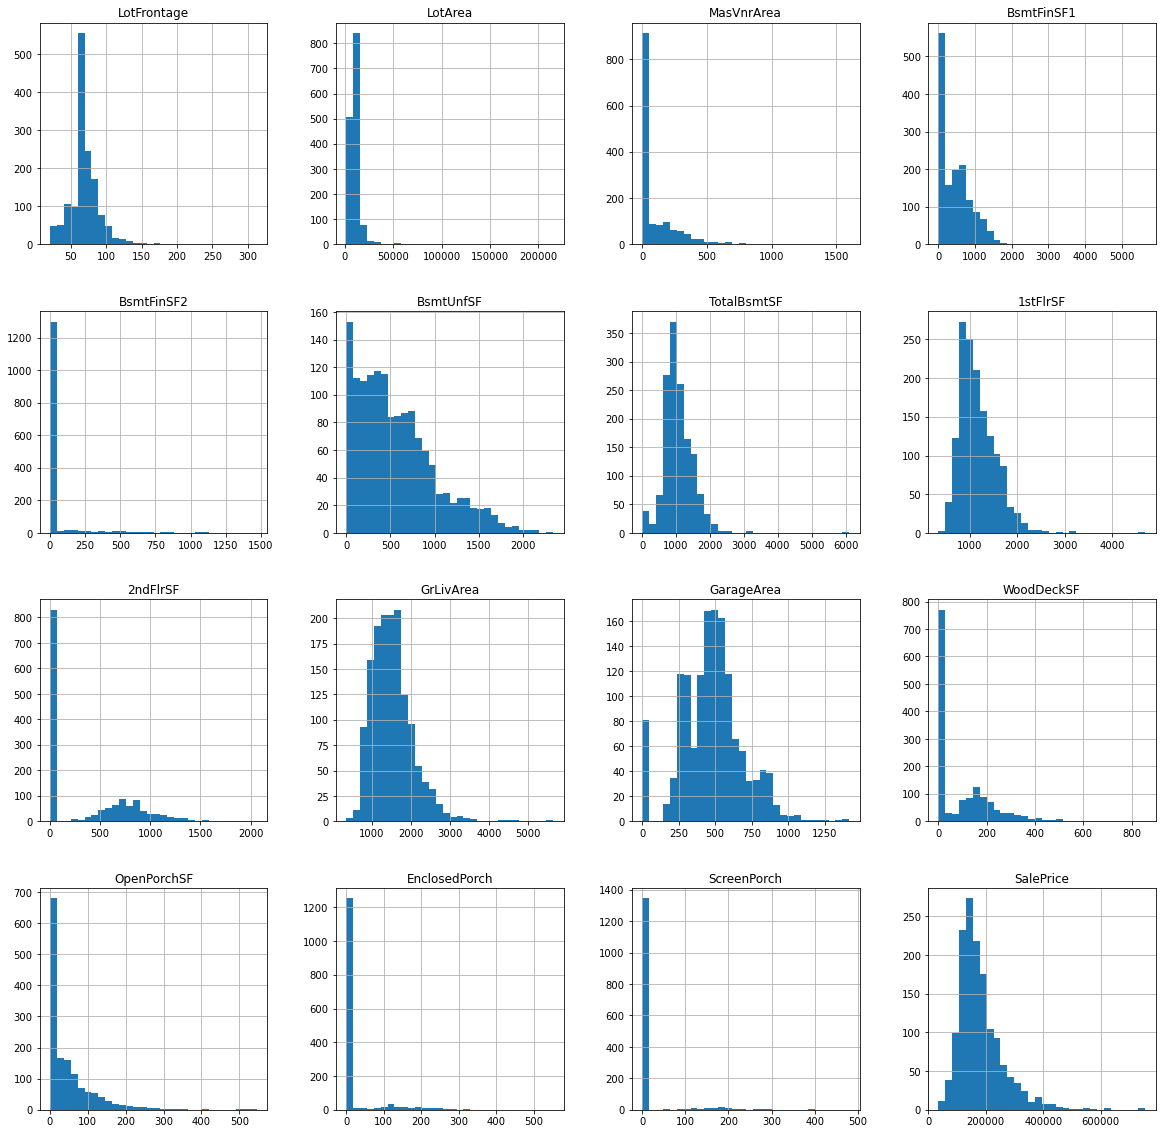

In [38]:
df[continuous_feature].hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [39]:
# Let's check for skewness
print(df[continuous_feature].skew())
#There is a lot of skewness present in the data. Let's transform them.

LotFrontage       2.409147
LotArea          12.207688
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
GrLivArea         1.366560
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
ScreenPorch       4.122214
SalePrice         1.882876
dtype: float64


# Before Treating Skewness, Splitting into train and test set to avoid data leakage

In [40]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size=0.8,test_size=0.2,random_state=42)

In [41]:
df_train.shape

(1168, 80)

In [42]:
df_test.shape

(292, 80)

Reducing Skewness

In [43]:
for col in df_train[continuous_feature].columns:
    if df_train.skew().loc[col]>0.55 and col!='SalePrice':
        df_train[col]=np.log1p(df_train[col])
        
df_train[continuous_feature].skew()
# We have successfully removed a lot of skewness

LotFrontage     -0.791847
LotArea         -0.012599
MasVnrArea       0.452588
BsmtFinSF1      -0.622601
BsmtFinSF2       2.561997
BsmtUnfSF       -2.188927
TotalBsmtSF     -5.274632
1stFlrSF         0.026976
2ndFlrSF         0.268476
GrLivArea        0.007943
GarageArea       0.109110
WoodDeckSF       0.181798
OpenPorchSF     -0.064149
EnclosedPorch    2.179302
ScreenPorch      3.062578
SalePrice        1.743129
dtype: float64

In [44]:
for col in df_test[continuous_feature].columns:
    if df_test.skew().loc[col]>0.55 and col!='SalePrice':
        df_test[col]=np.log1p(df_test[col])
        
df_test[continuous_feature].skew()
# We have successfully removed a lot of skewness from test data as well

LotFrontage     -1.176130
LotArea         -0.638320
MasVnrArea       0.719301
BsmtFinSF1      -0.604981
BsmtFinSF2       2.392241
BsmtUnfSF       -2.183736
TotalBsmtSF     -4.759196
1stFlrSF         0.295139
2ndFlrSF         0.377166
GrLivArea       -0.017474
GarageArea       0.439687
WoodDeckSF       0.037362
OpenPorchSF      0.127615
EnclosedPorch    1.879466
ScreenPorch      3.580515
SalePrice        2.264395
dtype: float64

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'WoodDeckSF'}>],
       [<AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>,
        <AxesSubplot:title={'center':'ScreenPorch'}>,
        <AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

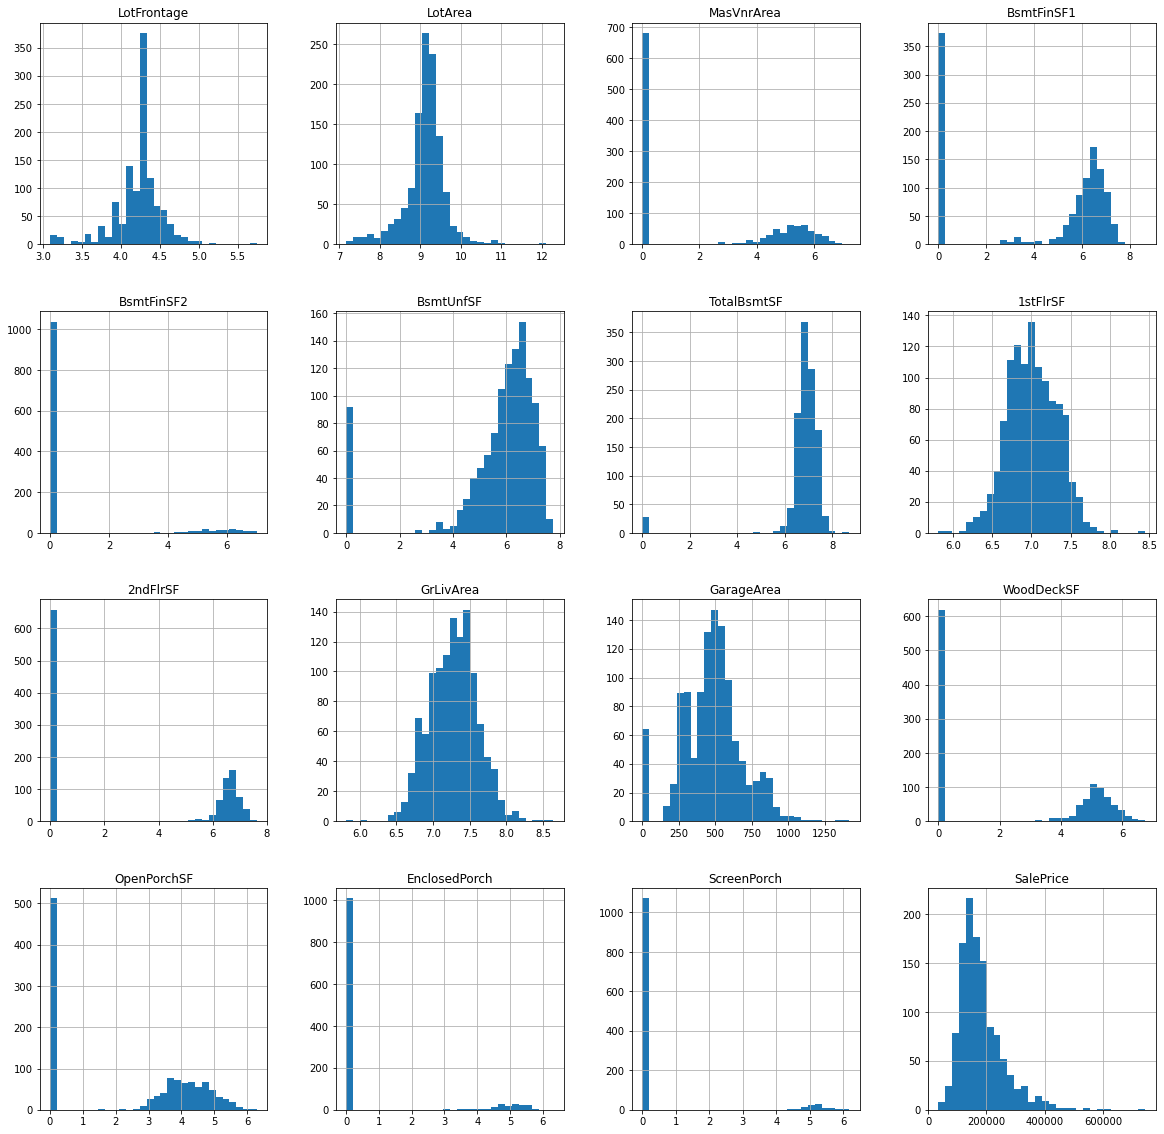

In [45]:
df_train[continuous_feature].hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

# Scaling the dataset

Splitting Dependent and Independent Features

In [46]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [47]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [48]:
#Lets scale the parameters
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=df_train.columns)
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.866764,-0.085049,0.144140,-0.167026,-0.058621,0.047674,0.765535,0.299798,-0.029273,0.610293,-0.221711,-0.003419,0.026625,-0.097506,-0.406197,-0.464506,-0.820445,0.372217,0.526141,1.452679,-0.513213,-0.128593,-0.761115,-0.848320,0.177571,-0.827815,0.762551,-2.368417,-0.550575,0.995666,0.332027,0.588657,0.824411,0.865283,0.343596,-0.351357,0.171738,0.374650,-0.148163,1.401559,0.276582,0.294195,0.526873,-0.879468,-0.118999,-0.292584,1.105320,-0.24287,-1.055566,-0.764098,0.136218,-0.212757,0.796416,-0.964566,0.259525,-0.958592,-0.071293,-0.788584,0.994436,0.110475,-1.056544,-0.863837,0.319012,0.303143,0.292826,1.184573,-1.096169,-0.395124,-0.121008,-0.299901,-0.070993,-0.071858,0.411342,-0.199685,-0.09274,-0.133417,1.650065,0.374565,0.070508
1,0.074110,-0.085049,-0.392921,-0.301310,-0.058621,0.047674,-1.356644,0.299798,-0.029273,0.610293,-0.221711,-0.697943,0.026625,-0.097506,-0.406197,0.453502,-0.088934,1.268609,-0.679464,-0.382563,-0.513213,-0.128593,0.748834,0.720703,0.177571,-0.827815,-1.188511,0.375939,0.789157,-0.566373,0.332027,0.588657,1.267536,-1.416429,0.343596,-0.351357,0.557902,-0.069945,-0.148163,0.252369,0.276582,0.294195,-1.040595,1.137011,-0.118999,0.250597,-0.818694,-0.24287,0.773664,1.236947,0.136218,-0.212757,0.796416,0.270755,0.259525,0.592150,1.628093,-0.788584,-0.543976,0.110475,0.295092,-0.456264,0.319012,0.303143,0.292826,-0.932610,0.617419,-0.395124,-0.121008,-0.299901,-0.070993,-0.071858,0.411342,-0.199685,-0.09274,-0.508010,0.893677,0.374565,0.070508
2,-0.631546,-0.085049,0.006402,-0.082046,-0.058621,0.047674,0.765535,0.299798,-0.029273,0.610293,-0.221711,-0.871574,-1.454227,-0.097506,-0.406197,-0.464506,-0.820445,1.268609,1.992419,1.694159,-0.513213,-0.128593,-0.761115,1.112958,0.177571,-0.827815,0.762551,0.375939,-0.550575,-1.347393,0.332027,0.588657,1.267536,-1.416429,0.343596,-0.351357,0.555860,-0.073306,-0.148163,0.252369,0.276582,-3.685961,-1.052445,-0.879468,-0.118999,-1.816242,-0.818694,-0.24287,-1.055566,-0.764098,-1.106774,-0.212757,0.796416,-1.582227,0.259525,-0.958592,-0.071293,1.826224,-0.045032,-0.727411,-2.408179,-2.257169,-2.614893,-2.844159,-1.707294,1.288260,-1.096169,2.590754,-0.121008,-0.299901,-0.070993,-0.071858,-0.919538,-0.199685,-0.09274,-0.508010,0.137290,0.374565,0.070508
3,-0.161109,-0.085049,-0.340186,-0.465400,-0.058621,0.047674,0.765535,0.299798,-0.029273,-1.859069,-0.221711,1.038367,-1.454227,-0.097506,-0.406197,-1.382513,-0.820445,1.268609,1.080068,1.645863,-0.513213,-0.128593,1.126321,1.112958,-1.014398,1.276291,0.762551,0.375939,-1.890306,-0.566373,0.332027,0.588657,-1.391217,0.704206,0.343596,-0.351357,-0.306380,-0.149413,-0.148163,-0.896821,0.276582,0.294195,-0.394093,1.142838,-0.118999,0.609851,1.105320,-0.24287,-1.055566,1.236947,0.136218,-0.212757,-0.419550,0.270755,0.259525,2.142892,1.628093,1.172522,1.618117,0.948360,-1.056544,-1.119755,0.319012,0.303143,0.292826,-0.932610,-1.096169,2.867816,-0.121008,-0.299901,-0.070993,-0.071858,-0.919538,-0.199685,-0.09274,-0.133417,-0.619098,0.374565,0.070508
4,-0.161109,-0.085049,-0.911425,-1.171176,-0.058621,4.025068,0.765535,0.299798,-0.029273,0.610293,-0.221711,1.038367,0.026625,-0.097506,-

In [49]:
#Lets scale the test parameters
X_test=sc.fit_transform(X_test)
X_test=pd.DataFrame(X_test,columns=df_test.columns)
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.896678,-0.179872,0.190409,-0.053205,-0.083045,-0.071146,0.692730,0.370494,0.0,0.483951,-0.241831,1.142638,0.041629,-0.117851,-0.433569,-0.425681,-0.007138,2.240811,0.270734,-0.986382,1.710146,-0.156721,-1.035908,-1.045675,0.164950,-0.726047,0.778107,0.320970,-0.522083,1.006290,0.298552,0.605017,-0.535321,0.771481,0.385007,-0.371068,0.195926,0.211863,-0.111276,1.474525,0.20702,0.327289,-0.030313,-0.833413,-0.125125,-0.738026,-0.825128,3.792112,-0.916735,-0.752281,0.269524,-0.20702,0.793522,-0.209302,0.214066,-0.922263,-0.091157,-0.775333,0.551756,0.075356,-0.917665,-0.874821,0.332849,0.308346,0.277196,1.069759,-0.987212,-0.440094,-0.100385,-0.263001,-0.058621,-0.058621,-1.151822,-0.167836,-0.156264,-1.480226,-1.337258,0.365317,0.063305
1,0.070376,-0.179872,1.237897,0.674001,-0.083045,-0.071146,-1.474525,0.370494,0.0,-2.268915,-0.241831,0.306841,0.041629,-0.117851,-0.433569,0.481610,1.382350,-0.489301,-0.682152,-0.396472,-0.470477,-0.156721,-1.035908,-1.045675,-1.136819,1.534296,-1.172171,0.320970,0.851324,-2.144775,0.298552,-1.906807,-0.535321,0.919506,0.385007,-0.371068,0.240326,0.470587,-0.111276,-0.837214,0.20702,0.327289,1.039680,1.317806,-0.125125,1.838686,1.117915,-0.234421,0.856025,1.191666,0.269524,-0.20702,-0.370842,1.624185,0.214066,2.191042,1.683370,-0.775333,-0.576953,0.075356,0.376819,1.126763,0.332849,0.308346,0.277196,1.057303,0.704401,-0.440094,-0.100385,-0.263001,-0.058621,-0.058621,0.363187,-0.167836,-0.156264,-0.772819,1.626532,0.365317,0.063305
2,-0.654914,1.411722,-0.501620,0.068356,-0.083045,-4.226072,0.692730,0.370494,0.0,0.483951,-0.241831,0.641160,-3.431425,-0.117851,-0.433569,-0.425681,-0.701882,0.420736,1.682416,1.815690,-0.470477,-0.156721,1.591133,1.670157,0.164950,-0.726047,0.778107,0.320970,-0.522083,1.006290,0.298552,0.605017,1.261389,-1.405086,0.385007,-0.371068,0.686109,0.172355,-0.111276,0.318656,0.20702,-3.169111,-0.150538,-0.833413,-0.125125,-0.847503,-0.825128,-0.234421,-0.916735,-0.752281,-0.905119,-0.20702,0.793522,-0.820464,0.214066,0.634389,-0.978421,1.187648,2.223917,0.921666,0.376819,-0.445910,0.332849,0.308346,0.277196,-1.005815,-0.987212,2.284763,-0.100385,-0.263001,-0.058621,-0.058621,0.363187,-0.167836,-0.156264,-1.126522,1.626532,0.365317,0.063305
3,-0.171387,1.411722,-0.852082,-1.059428,-0.083045,-0.071146,0.692730,0.370494,0.0,-2.268915,-0.241831,-1.531914,-1.694898,-0.117851,-0.433569,-1.332973,-0.007138,1.330774,0.835407,1.619054,-0.470477,-0.156721,-1.411199,-1.433651,0.164950,-0.726047,0.778107,-2.803141,-0.522083,1.006290,0.298552,0.605017,-1.433676,0.601725,0.385007,-0.371068,0.418186,0.169172,-0.111276,-0.837214,0.20702,0.327289,-0.224938,1.155477,-0.125125,0.533978,-0.825128,-0.234421,0.856025,-0.752281,0.269524,-0.20702,0.793522,0.401860,0.214066,2.191042,-0.978421,1.187648,1.095208,0.921666,0.376819,-0.177841,0.332849,0.308346,0.277196,-1.005815,0.570082,1.578129,-0.100385,-0.263001,-0.058621,-0.058621,0.363187,-0.167836,-0.156264,1.349404,-1.337258,0.365317,0.063305
4,-0.896678,-0.179872,0.937583,0.772719,-0.083045,-0.071146,-1.474525,-2.175020,0.0,0.483951,-0.241831,1.811276,0.041629,-0.117851,-0.433569,-0.425681,2.077094,-0.489301,-1

# Modelling

# 1. Random Forest Regressor with PCA

# Selecting and reducing to Optimum Features with PCA

In [50]:
x=X_train.copy()
from sklearn.decomposition import PCA 
for i in range(30,79):
    pca = PCA(n_components=i)
    x_pca=pca.fit_transform(x)
    print(i," variance :{}".format(np.sum(pca.explained_variance_ratio_)))

30  variance :0.7271235077584368
31  variance :0.7381935395159026
32  variance :0.7491380498996518
33  variance :0.7595930781211164
34  variance :0.7695472046280569
35  variance :0.7800287511977403
36  variance :0.790180651113952
37  variance :0.7995516497338493
38  variance :0.8091044484921723
39  variance :0.8180852708436187
40  variance :0.8271608263833344
41  variance :0.8356237638403851
42  variance :0.8437890037690572
43  variance :0.8527291520851646
44  variance :0.8606993318916997
45  variance :0.8684035132548812
46  variance :0.8757022737960789
47  variance :0.883298736009332
48  variance :0.8902213066002034
49  variance :0.8968796599278004
50  variance :0.9032442198493944
51  variance :0.9095061719362577
52  variance :0.9158210065342021
53  variance :0.9218906528696148
54  variance :0.9276260129186666
55  variance :0.9332913999567303
56  variance :0.938781746919611
57  variance :0.9439950533616057
58  variance :0.9487365637150417
59  variance :0.9533733168686368
60  variance 

In [51]:
# Selecting 70 features, as it explains 99% of data

In [52]:
pca = PCA(n_components=70)
x=pca.fit_transform(x)
x_t=X_test.copy()
x_t=pca.fit_transform(x_t)

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
parameters={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
rfr=RandomForestRegressor()
rand = RandomizedSearchCV(estimator = rfr, param_distributions = parameters, 
                          n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,scoring='r2')
rand.fit(x,y_train)
rand.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 18.9min finished


{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [54]:
rfr=RandomForestRegressor(n_estimators =1800,
                         min_samples_split= 5,
                         min_samples_leaf= 4,
                         max_features= 'auto',
                         max_depth= 80,
                         bootstrap= True)

In [55]:
rfr.fit(x,y_train)
y_pred = rfr.predict(x_t)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  41621.690289391634
r2_score is:  0.7741471411055758


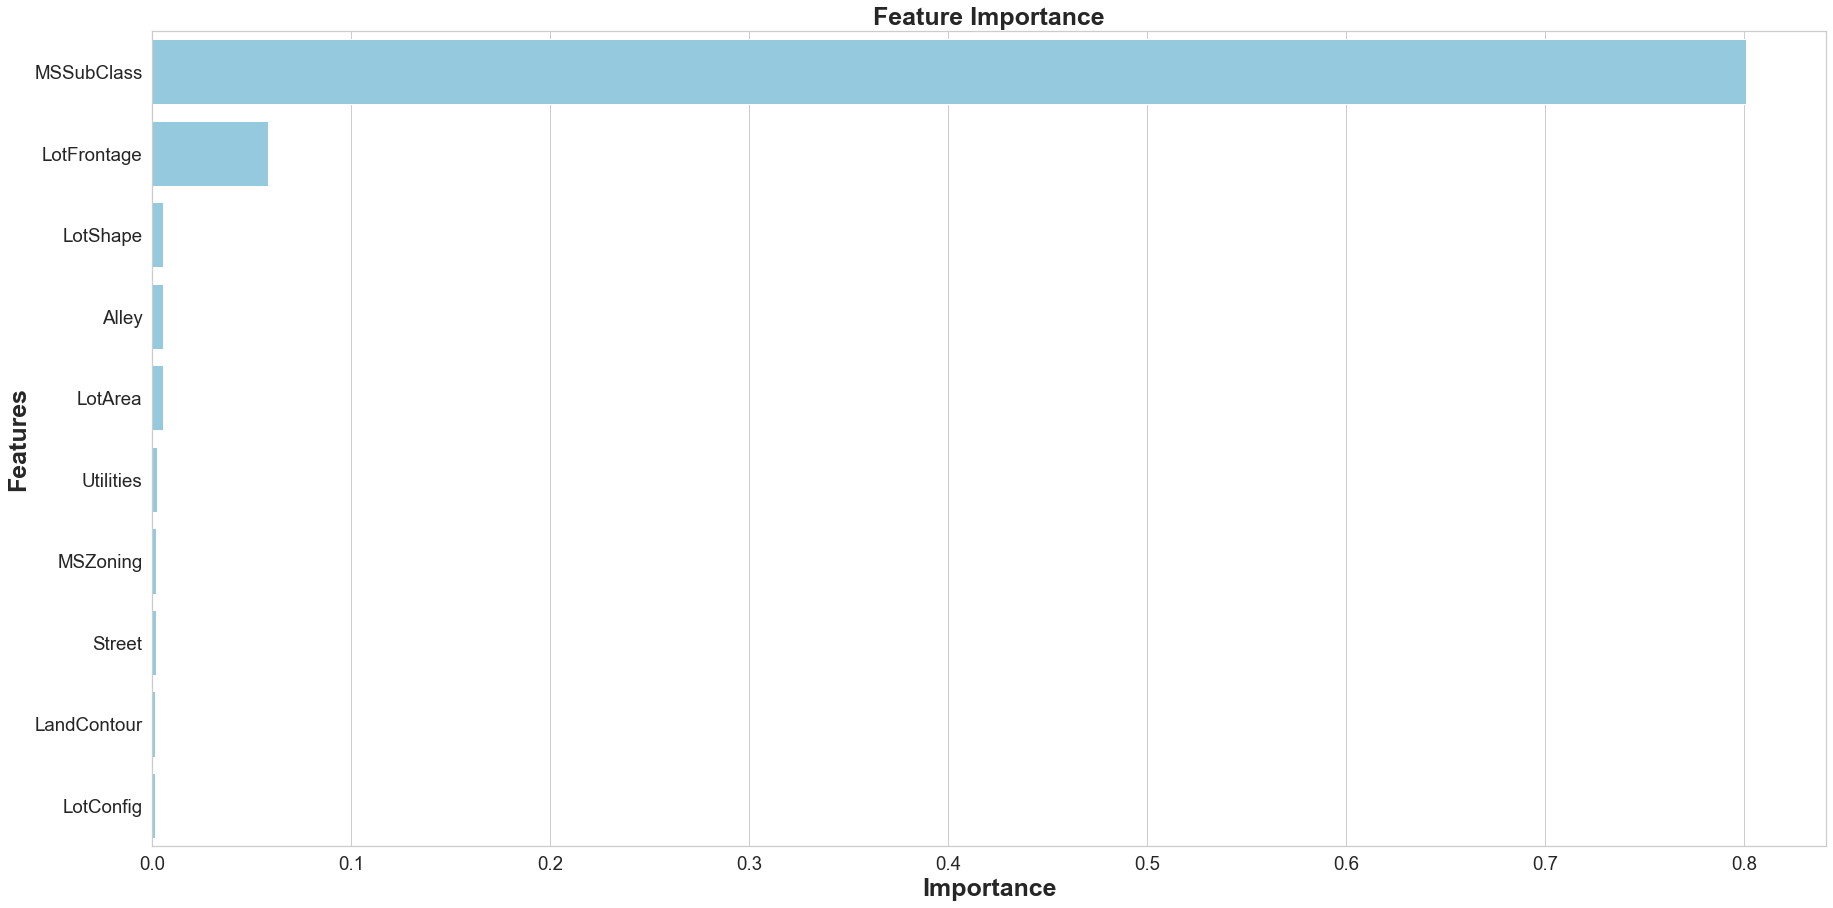

None

,Features,Gini-Importance
0,MSSubClass,0.801095
1,LotFrontage,0.058321
2,LotShape,0.005449
3,Alley,0.005347
4,LotArea,0.005258
5,Utilities,0.002516
6,MSZoning,0.002034
7,Street,0.001795
8,LandContour,0.001484
9,LotConfig,0.001342


In [56]:
feats = {}
for feature, importance in zip(data.columns, rfr.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'}).head(10)
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

# 2. XGBoost Regressor with PCA

In [57]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBRegressor

In [58]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [59]:
xg = XGBRegressor(learning_rate=0.02, n_estimators=600,
                    silent=True, nthread=1)

In [60]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xg, param_distributions=params, n_iter=5, scoring='r2', 
                                   n_jobs=4, cv=skf.split(x,y_train), verbose=3, random_state=1001 )

In [61]:
random_search.fit(x,y_train)
random_search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   45.1s finished


[12:52:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




{'subsample': 0.8,
 'min_child_weight': 1,
 'max_depth': 4,
 'gamma': 1,
 'colsample_bytree': 1.0}

In [62]:
xg = XGBRegressor(learning_rate=0.02, n_estimators=600,
                    silent=True, nthread=1,subsample = 0.8,
                    min_child_weight= 1, max_depth = 4, gamma = 1,
                    colsample_bytree = 1.0)

In [63]:
xg.fit(x,y_train)
y_pred = xg.predict(x_t)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

[12:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


RMSE is:  43960.40768938855
r2_score is:  0.7480527695932312


# 3. Linear Regression with RFE
    a. Lasso 
    b. Ridge

In [64]:
# Eliminate features at a step 0.05*n_featurees
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
def feature_RFE(model,train_data,y_data):
    support = []
    n_features = []
    scores = []
    rfecv = RFECV(estimator=model, step=0.05, cv=KFold(5,random_state=0,shuffle=True))
    rfecv.fit(train_data, y_train)
    return rfecv

In [65]:
# Now we run RFE for linear regression
from sklearn.linear_model import LinearRegression
lm  = LinearRegression()
rfecv = feature_RFE(lm,X_train,y_train)

In [66]:
print("Optimal RFE number of features : %d" % rfecv.n_features_)
print("Feature Ranking: ")
print(rfecv.ranking_)

Optimal RFE number of features : 49
Feature Ranking: 
[ 1  8  1  1  1  1  2  1  1  4  1  1  7  1  1  1  1  1  1 10  1  1  1  1
  2 11  1 11  1  1  1  1  1  1  6  3  4  5  5 11  9 10  1  1 10  1  1  9
  1  1  1  1  1  1  1  1  3  1  6  1  1  1  6  1  2  1  8  7  3  1  1  1
  8  5  7  4  9  1  1]


In [67]:
from sklearn.feature_selection import RFE
lm.fit(X_train,y_train)
rfe = RFE(lm,49)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=49)

In [68]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

# Lets filter the train and test set for the RFE selected columns

In [69]:
X_train_lm = X_train[rfe_sel_columns]
X_test_lm = X_test[rfe_sel_columns]

In [70]:
X_train_lm.shape

(1168, 49)

# 3 a) Lasso regression model with Grid search CV

In [71]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
from sklearn.metrics import r2_score

folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train_lm,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    2.1s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [72]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 20.0}

In [73]:
lasso = Lasso(alpha=20)
lasso.fit(X_train_lm,y_train)

y_train_pred = lasso.predict(X_train_lm)
y_test_pred = lasso.predict(X_test_lm)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8413407167403752
0.8115457630494485


In [74]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [75]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,MSSubClass,181441.541952
46,BsmtFullBath,28383.907099
13,Condition2,18222.129811
29,BsmtQual,16988.777175
36,BsmtUnfSF,8861.579874
26,ExterQual,8201.874033
3,LotArea,8057.779549
14,BldgType,5100.147794
42,1stFlrSF,4555.326143
37,TotalBsmtSF,4290.758101


# 3 b) Now lets use the ridge regression

In [76]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train_lm,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [77]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 20.0}

In [78]:
ridge = Ridge(alpha=20)
ridge.fit(X_train_lm,y_train)

y_train_pred = ridge.predict(X_train_lm)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test_lm)
print(r2_score(y_test,y_test_pred))

0.8399787386121278
0.8112957990384801


In [79]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,181441.541952
13,Condition2,17469.507654
29,BsmtQual,14002.808250
46,BsmtFullBath,11773.142905
36,BsmtUnfSF,8401.963458
3,LotArea,7792.129275
26,ExterQual,7726.306674
27,ExterCond,6458.197419
14,BldgType,5151.270112
41,Electrical,5117.902409


# Final Model

In [80]:
lasso = Lasso(alpha=20)
lasso.fit(X_train_lm,y_train)

y_train_pred = lasso.predict(X_train_lm)
y_test_pred = lasso.predict(X_test_lm)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8413407167403752
0.8115457630494485


The R2 score is almost equal for both training and test data.

In [81]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE is:  43960.40768938855


# Top 10 Features

In [117]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [127]:
# Let's convert all coeff values to absolute to compare positive and negative importance of the featutres
df_feature=lasso_coef
df_feature['Coef_Absolute']=df_feature['Coef'].abs()
df_feature['Colour']=''
for i in range(len(df_feature)):
    if df_feature['Coef'][i] < 0:
        df_feature['Colour'][i]='green'
    else:
        df_feature['Colour'][i]='blue'

In [130]:
df_top=df_feature.sort_values('Coef_Absolute',ascending=False).head(10)
df_top

,Feature,Coef,Coef_Absolute,Colour
0,MSSubClass,181441.541952,181441.541952,blue
46,BsmtFullBath,28383.907099,28383.907099,blue
47,BsmtHalfBath,-27781.415681,27781.415681,green
13,Condition2,18222.129811,18222.129811,blue
29,BsmtQual,16988.777175,16988.777175,blue
35,BsmtFinSF2,-9269.760718,9269.760718,green
36,BsmtUnfSF,8861.579874,8861.579874,blue
26,ExterQual,8201.874033,8201.874033,blue
3,LotArea,8057.779549,8057.779549,blue
22,Exterior1st,-7578.851452,7578.851452,green


Text(0.5, 1.0, 'Effect of Top 10 Features on Sales Price')

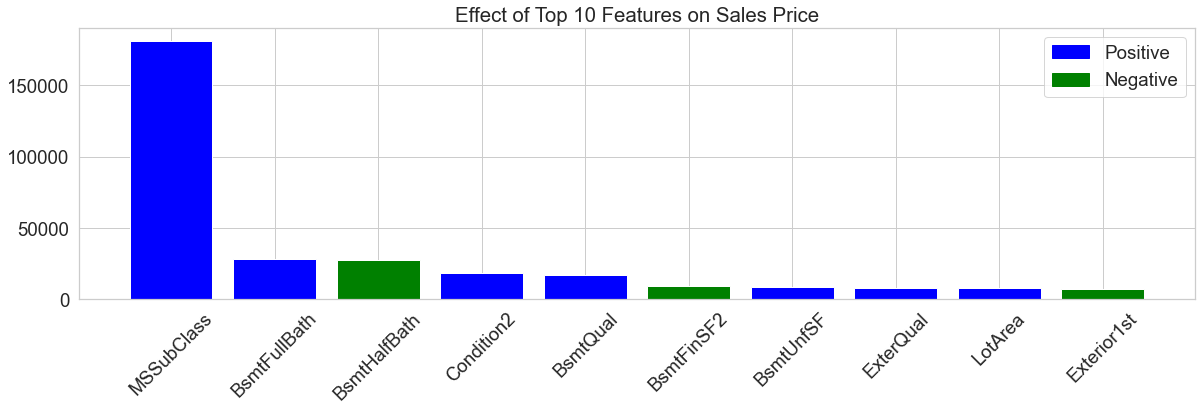

In [138]:
plt.figure(figsize=(20,5))
colors = {'Positive':'blue', 'Negative':'green'}         
labels = list(colors.keys())
plt.bar(df_top.Feature, df_top.Coef_Absolute, color = df_top.Colour, label=labels)
plt.xticks(rotation=45)
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title('Effect of Top 10 Features on Sales Price')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

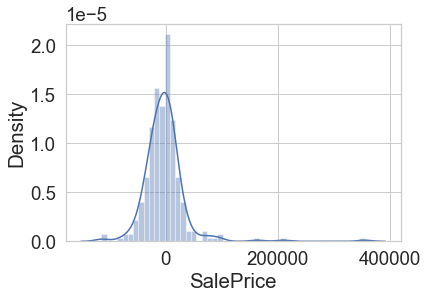

In [139]:
sns.distplot(y_test-y_test_pred)

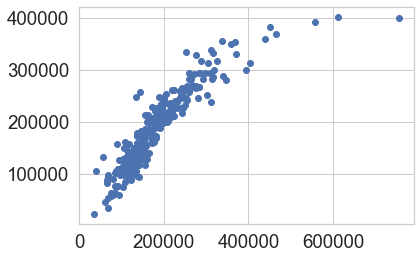

In [140]:
# We are getting an almost normal distribution in our predicted values
plt.scatter(y_test,y_test_pred)

In [142]:
# The model is also almost a straight line

In [147]:
import joblib
joblib.dump(lasso,'House_Price_Prediction.pkl')

['House_Price_Prediction.pkl']

# END